In [1]:
import numpy as np
import pandas as pd

import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
file = 'train.csv'

In [3]:
data = pd.read_csv(file, nrows = 1000)

In [4]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1000.000000,1000.000000,827.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,994.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,56.880000,69.95526,10691.176000,6.125000,5.587000,1971.633000,1985.279000,109.225352,445.214000,...,97.353000,47.669000,21.413000,3.703000,15.055000,1.160000,45.384000,6.307000,2007.830000,182284.451000
std,288.819436,42.256375,23.20269,11412.668294,1.383217,1.108901,30.007945,20.412296,188.885856,442.394927,...,124.392314,67.988557,60.696528,30.915733,55.467744,26.103329,525.449337,2.691095,1.326974,80291.215207
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1880.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,250.750000,20.000000,60.00000,7585.250000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,500.500000,50.000000,70.00000,9451.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,384.500000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,750.250000,70.000000,80.00000,11628.500000,7.000000,6.000000,2000.250000,2004.000000,174.750000,725.000000,...,171.250000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1000.000000,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,523.000000,552.000000,508.000000,410.000000,648.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
correlation = data.corr()['SalePrice'].abs()
high_corr = list(correlation.index[correlation>0.4])
high_corr

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [6]:
data[high_corr].describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice
count,1000.000000,1000.000000,1000.000000,994.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,944.000000,1000.000000,1000.000000,1000.000000
mean,6.125000,1971.633000,1985.279000,109.225352,1061.312000,1156.953000,1510.493000,1.566000,6.495000,0.610000,1978.681144,1.765000,473.350000,182284.451000
std,1.383217,30.007945,20.412296,188.885856,421.945889,375.215801,512.296179,0.551315,1.608901,0.649863,24.792266,0.743187,208.901597,80291.215207
min,1.000000,1880.000000,1950.000000,0.000000,0.000000,334.000000,334.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,34900.000000
25%,5.000000,1954.000000,1967.000000,0.000000,796.000000,876.750000,1125.750000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,130000.000000
50%,6.000000,1974.000000,1994.000000,0.000000,1004.000000,1087.000000,1456.000000,2.000000,6.000000,1.000000,1980.500000,2.000000,480.000000,163995.000000
75%,7.000000,2000.250000,2004.000000,174.750000,1305.500000,1389.500000,1774.250000,2.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,215000.000000
max,10.000000,2010.000000,2010.000000,1600.000000,3206.000000,3228.000000,4676.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,755000.000000


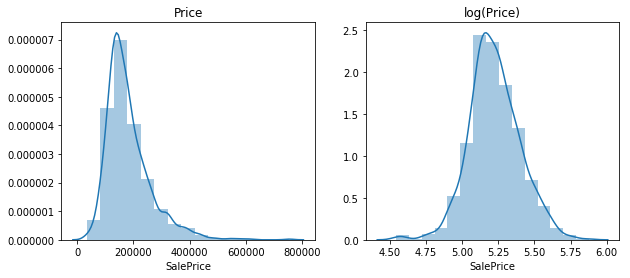

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = sbn.distplot(data['SalePrice'], 
                  bins = 15,
                  ax = axes[0]
                 )
ax.set_title('Price')

ax = sbn.distplot(data['SalePrice'].apply(np.log10),
                  bins = 15,
                  ax = axes[1]
                 )
ax.set_title('log(Price)');

In [8]:
data['SalePrice'] = data['SalePrice'].apply(np.log10)

In [9]:
high_corr = list(data.corr()['SalePrice'].abs().sort_values(ascending = False)[:20].index)
print(data.corr()['SalePrice'][high_corr],'\n')

SalePrice       1.000000
OverallQual     0.820357
GrLivArea       0.729576
GarageCars      0.692115
GarageArea      0.669371
TotalBsmtSF     0.636265
1stFlrSF        0.616163
FullBath        0.599327
YearBuilt       0.588425
YearRemodAdd    0.582795
TotRmsAbvGrd    0.562970
GarageYrBlt     0.545101
Fireplaces      0.489037
MasVnrArea      0.441166
LotFrontage     0.387056
BsmtFinSF1      0.376119
WoodDeckSF      0.334386
HalfBath        0.333403
2ndFlrSF        0.331154
OpenPorchSF     0.320871
Name: SalePrice, dtype: float64 



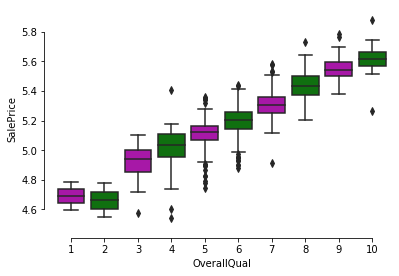

In [10]:
# Draw a nested boxplot to show bills by day and time
sbn.boxplot(y="SalePrice", x="OverallQual",
            palette=["m", "g"],
            data=data)

sbn.despine(offset=10, trim=True)

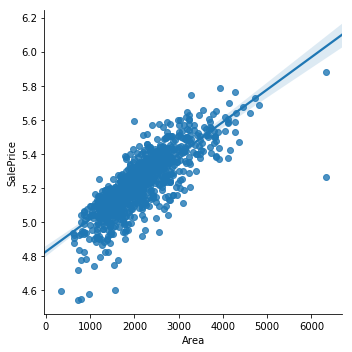

In [11]:
area_feat = []
for feat in high_corr:
    if 'Area' in feat:
        area_feat.append(feat)

data['Area'] = data[area_feat].sum(axis = 1)

sbn.lmplot(x = 'Area', y = 'SalePrice', data = data)

In [12]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=1)
data['TSNE'] = tsne.fit_transform(data[high_corr].fillna(0))

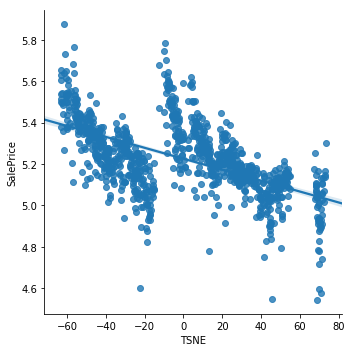

In [22]:
sbn.lmplot(x = 'TSNE', y = 'SalePrice', data = data)